## IMPORT FILES

In [16]:
###Import Libraries
import geopandas as gpd
import pandas as pd
from haversine import haversine
import math
import numpy as np
from ggplot import *
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import folium
from branca.colormap import linear
from sklearn.preprocessing import scale
import seaborn as sns
from pandas.plotting import table

In [41]:
shp = gpd.read_file("/home/dibyajyoti/Project/IND_adm/IND_adm3.shx")

In [42]:
fp ="/home/dibyajyoti/Project/F/"

In [43]:
shp.to_file(fp+'_adm3.json', driver="GeoJSON")

In [44]:
###Creating base layer of leaflet map
map1 =folium.Map(location=[22, 83], zoom_start=4.5, tiles='Mapbox Bright')

In [45]:
###Creating color map        
colormap = linear.YlGnBu.scale()

In [46]:
###adding the json layer to map
map1 =map1.add_child(folium.GeoJson(data=open(fp+'_adm3.json').read(),
                              style_function=lambda x: {'fillColor': colormap(x['properties']),'color': 'black','weight': 0,'fillOpacity':1.0 }))
map1 =map1.add_child(folium.GeoJson(data=open("/home/dibyajyoti/Project/Final Report/Files/DistrictShapeFile/2011_State.geojson").read(),
                              style_function=lambda x: {'color': 'black','weight': 2,'fillOpacity':1.0 }))
map1.save(outfile=fp+"_adm3_Map.html")

## CLUSTERING DISTRIBUTION OF HOUSEHOLD

### VILLAGES

In [12]:
###Initializing important keywords
var_study='Asset'
var_scale='Village'
fp="/home/dibyajyoti/Project/Asset/"

In [ ]:
###List of important variables
list_selVar=[s for s in list(df_Vill) if var_study in s]

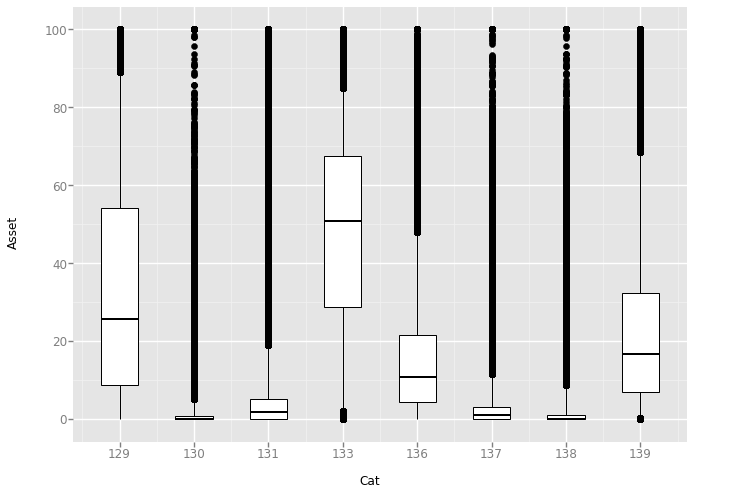

In [13]:
### Initial boxplot and save it
df_longVill=pd.DataFrame()

for i in  list_var:
    df_temp=pd.DataFrame()
    df_temp[var_scale]=df_Vill.loc[:,var_scale]
    df_temp[var_study]=df_Vill[i]
    df_temp['Cat']=i
    df_longVill=df_longVill.append(df_temp)
    del df_temp
plot=ggplot(df_longVill, aes(x='Cat', y=var_study))+geom_boxplot()
del df_longVill
plot.save(fp+var_scale+"_"+var_study+"_BoxPlot.png")

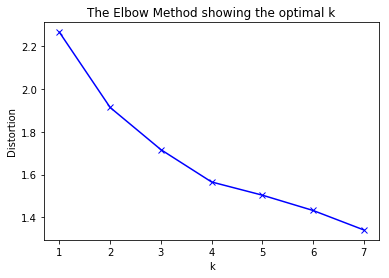

In [14]:
###Clustering the data using k-means and obtaining elbow plot

X=np.array(df_Vill[list_var])
X=scale(X, axis=0)

###k means determine k
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

###Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
### Clustering the data using k-Means
kmeanModel = KMeans(n_clusters=3).fit(X)
df_labels= pd.DataFrame(data={var_scale:df_Vill['Village'], var_scale+'_HHD_Cluster_'+var_study :kmeanModel.labels_})

2    350888
0    313204
1     26299
Name: Village_HHD_Cluster_Asset, dtype: int64


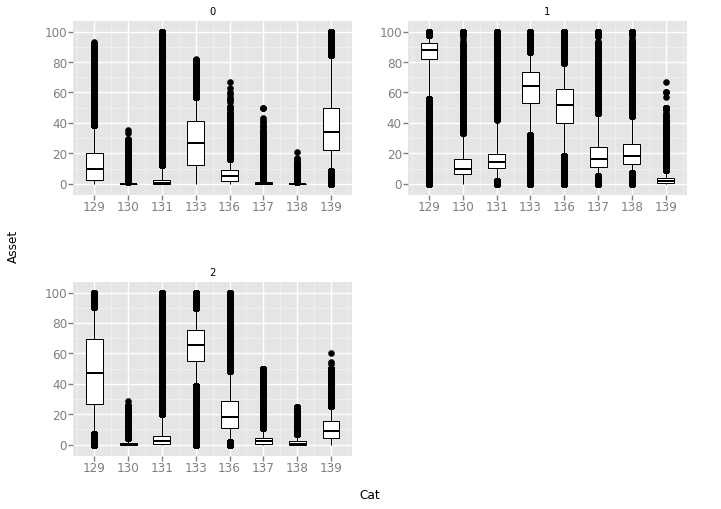

<ggplot: (8733910953661)>

In [20]:
### Displaying plot for correct labelling
df_dupVill=df_Vill.copy(deep= True)
df_dupVill[var_scale+'_HHD_Cluster_'+var_study]=df_labels[var_scale+'_HHD_Cluster_'+var_study]
df_longVill=pd.DataFrame()
df_temp=pd.DataFrame()
for i in  list_var:
    df_temp[var_scale]=df_dupVill.loc[:,var_scale]
    df_temp[var_study]=df_dupVill[i]
    df_temp['Cat']=i
    df_temp[var_scale+'_HHD_Cluster_'+var_study]=df_dupVill.loc[:,var_scale+'_HHD_Cluster_'+var_study]
    df_longVill=df_longVill.append(df_temp)
plot=ggplot(df_longVill, aes(x='Cat', y=var_study))+geom_boxplot()+facet_wrap(var_scale+'_HHD_Cluster_'+var_study)
del df_dupVill
del df_temp
del df_longVill
print(df_labels[var_scale+'_HHD_Cluster_'+var_study].value_counts())
plot

In [21]:
### Correcting the labels

####BF: Bathroom Facility 
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="1. Under-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="2. Moderately-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="3. Developed"
"""

####FC: Fuel for Cooking 
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="1. Under-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="2. Moderately-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="3. Developed"
"""
####CHH: Condition of HouseHold 
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="1. Under-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="2. Under-Developed+"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="3. Developed-"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==3,var_scale+'_HHD_Cluster_'+var_study]="4. Developed"
"""

####MSW: Main Source of Water
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="1. Under-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="2. Moderately-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="3. Developed"
"""
####MSL: Main Source of Lightining 
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="1. Under-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="2. Moderately-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="3. Developed"
"""

####EMP: Employement

"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="1. High Unemployement"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="2. High AL"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="3. High Non-AL"
"""
####EMP: Asset Ownership

df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="1. Low Asset Ownership"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="2. Mod Asset Ownership"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="3. High Asset Ownership"


In [22]:
### Merging for boxplot and histogram
df_Vill[var_scale+'_HHD_Cluster_'+var_study]=df_labels[var_scale+'_HHD_Cluster_'+var_study]

2. Mod Asset Ownership     350888
1. Low Asset Ownership     313204
3. High Asset Ownership     26299
Name: Village_HHD_Cluster_Asset, dtype: int64


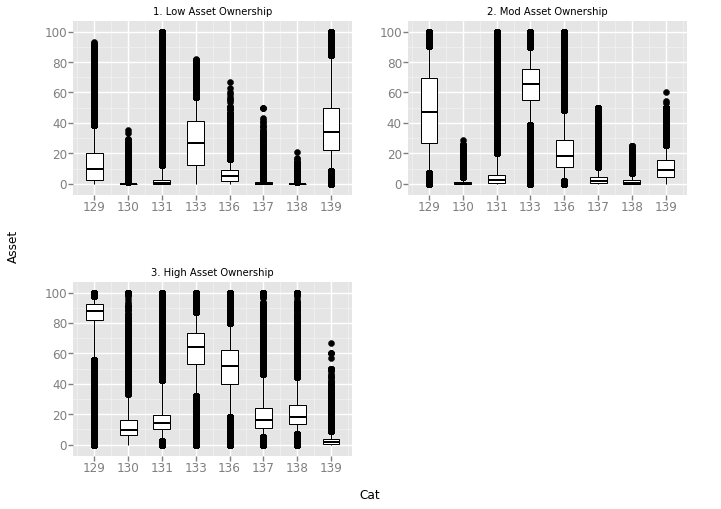

In [23]:
###  Saving the boxplots for different clusters
df_longVill=pd.DataFrame()
df_temp=pd.DataFrame()
for i in  list_var:
    df_temp[var_scale]=df_Vill.loc[:,var_scale]
    df_temp[var_study]=df_Vill[i]
    df_temp['Cat']=i
    df_temp[var_scale+'_HHD_Cluster_'+var_study]=df_Vill.loc[:,var_scale+'_HHD_Cluster_'+var_study]
    df_longVill=df_longVill.append(df_temp)
plot=ggplot(df_longVill, aes(x='Cat', y=var_study))+geom_boxplot()+facet_wrap(var_scale+'_HHD_Cluster_'+var_study)
del df_longVill
del df_temp
print(df_labels[var_scale+'_HHD_Cluster_'+var_study].value_counts())
plot.save(fp+var_scale+'_HHD_Cluster_'+var_study+"_BoxPlot.png")

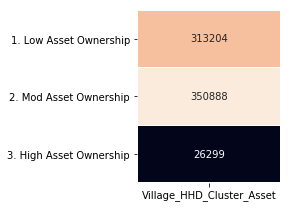

In [24]:
### Saving the counts of different clusters
df_temp=pd.DataFrame(df_labels[var_scale+'_HHD_Cluster_'+var_study].value_counts())
df_temp=df_temp.sort_index()
ax = sns.heatmap(df_temp, annot=True, fmt="d", linewidths=.5, cbar=False)
fig=ax.get_figure()
fig.set_size_inches(5, 3)
fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9, left=0.5)
fig.savefig(fp+var_scale+'_HHD_Cluster_'+var_study+"_Count.png")

In [25]:
### Saving the labels
df_labels.to_csv(fp+var_scale+'_HHD_Cluster_'+var_study+"_Labels.csv")

### DISTRICTS

In [26]:
###Initializing important keywords
var_study='Asset'
var_scale='District'
fp="/home/dibyajyoti/Project/Asset/"

In [ ]:
###List of important variables
list_selVar=[s for s in list(list_var) if var_study in s]

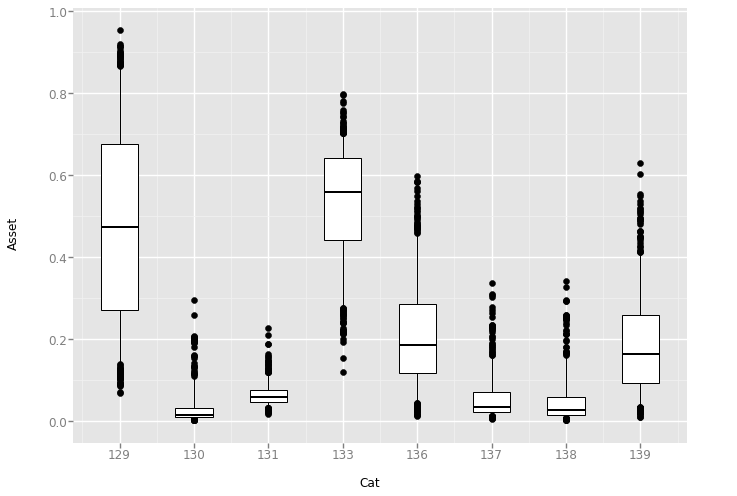

In [27]:
### Initial boxplot and save it
df_longVill=pd.DataFrame()
df_temp=pd.DataFrame()
for i in  list_var:
    df_temp[var_scale]=df_Dist.loc[:,var_scale]
    df_temp[var_study]=df_Dist[i]
    df_temp['Cat']=i
    df_longVill=df_longVill.append(df_temp)
plot=ggplot(df_longVill, aes(x='Cat', y=var_study))+geom_boxplot()
del df_longVill
del df_temp
plot.save(fp+var_scale+"_"+var_study+"_BoxPlot.png")

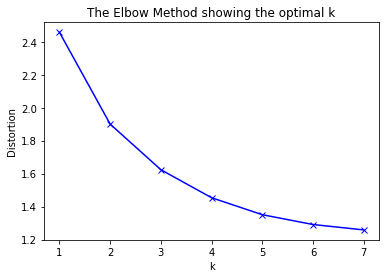

In [28]:
###Clustering the data using k-means and obtaining elbow plot
X=np.array(df_Dist[list_var])
X=scale(X, axis=0)

###k means determine k
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

###Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [29]:
### Clustering the data using k-Means
kmeanModel = KMeans(n_clusters=3).fit(X)
df_labels= pd.DataFrame(data={var_scale:df_Dist[var_scale], var_scale+'_HHD_Cluster_'+var_study :kmeanModel.labels_})

2    295
1    275
0     70
Name: District_HHD_Cluster_Asset, dtype: int64


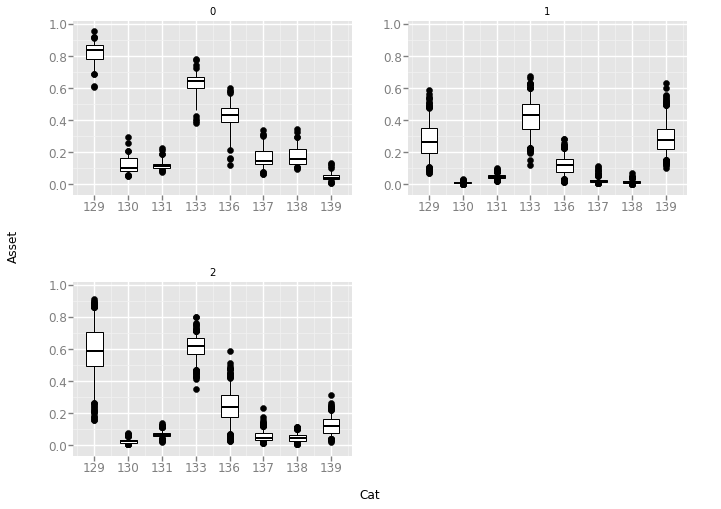

<ggplot: (8733911197481)>

In [30]:
### Displaying plot for correct labelling
df_longVill=pd.DataFrame()
df_temp=pd.DataFrame()
for i in  list_var:
    df_temp=pd.DataFrame()
    df_temp[var_scale]=df_Dist.loc[:,var_scale]
    df_temp[var_study]=df_Dist[i]
    df_temp['Cat']=i
    df_temp[var_scale+'_HHD_Cluster_'+var_study]=kmeanModel.labels_
    df_longVill=df_longVill.append(df_temp)
    del df_temp
plot=ggplot(df_longVill, aes(x='Cat', y=var_study))+geom_boxplot()+facet_wrap(var_scale+'_HHD_Cluster_'+var_study)
del df_longVill
print(df_labels[var_scale+'_HHD_Cluster_'+var_study].value_counts())
plot

In [31]:
### Correcting the labels

####BF: Bathroom Facility
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="1. Under-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="2. Moderately-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="3. Developed"
"""
####FC: Fuel for Cooking
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="1. Under-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="2. Moderately-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="3. Developed"
"""

####CHH: Condition of HouseHold
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="1. Under-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="2. Moderately-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="3. Developed"
"""
####MSW: Main Source of Water 
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="1. Under-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="2. Moderately-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="3. Developed"
"""
####MSL: Main Source of Lightining 
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="1. Under-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="2. Moderately-Developed"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="3. Developed"
"""

####EMP: Employement
"""
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="1. High Unemployment"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="3. High Emp"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="2. High Mar Emp"
#df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==3,var_scale+'_HHD_Cluster_'+var_study]="4. Moderate AL-MAR"
"""
####EMP: Asset Ownership

df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==1,var_scale+'_HHD_Cluster_'+var_study]="1. Low Asset Ownership"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==2,var_scale+'_HHD_Cluster_'+var_study]="2. Mod Asset Ownership"
df_labels.loc[df_labels[var_scale+'_HHD_Cluster_'+var_study]==0,var_scale+'_HHD_Cluster_'+var_study]="3. High Asset Ownership"


In [32]:
### Merging for boxplot and histogram
df_Dist[var_scale+'_HHD_Cluster_'+var_study]=df_labels[var_scale+'_HHD_Cluster_'+var_study]

2. Mod Asset Ownership     295
1. Low Asset Ownership     275
3. High Asset Ownership     70
Name: District_HHD_Cluster_Asset, dtype: int64


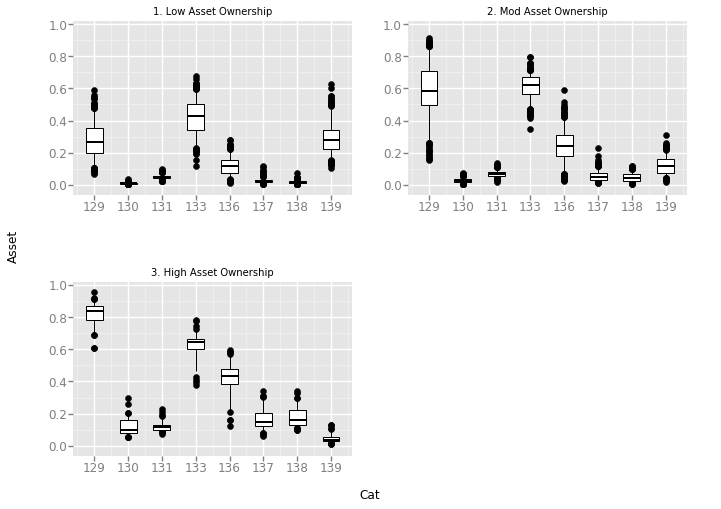

In [33]:
###  Saving the boxplots for different clusters
df_longVill=pd.DataFrame()
for i in  list_var:
    df_temp=pd.DataFrame()
    df_temp[var_scale]=df_Dist.loc[:,var_scale]
    df_temp[var_study]=df_Dist[i]
    df_temp['Cat']=i
    df_temp[var_scale+'_HHD_Cluster_'+var_study]=df_labels[var_scale+'_HHD_Cluster_'+var_study]
    df_longVill=df_longVill.append(df_temp)
    del df_temp
plot=ggplot(df_longVill, aes(x='Cat', y=var_study))+geom_boxplot()+facet_wrap(var_scale+'_HHD_Cluster_'+var_study)
del df_longVill
print(df_labels[var_scale+'_HHD_Cluster_'+var_study].value_counts())
plot.save(fp+var_scale+'_HHD_Cluster_'+var_study+"_BoxPlot.png")

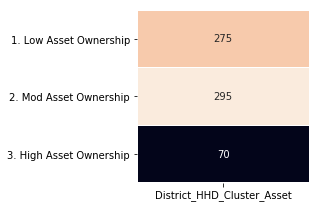

In [34]:
### Saving counts of districts in different clusters
df_temp=pd.DataFrame(df_labels[var_scale+'_HHD_Cluster_'+var_study].value_counts())
df_temp=df_temp.sort_index()
ax = sns.heatmap(df_temp, annot=True, fmt="d", linewidths=.5, cbar=False)
fig=ax.get_figure()
fig.set_size_inches(6, 3)
fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9, left=0.5)
fig.savefig(fp+var_scale+'_HHD_Cluster_'+var_study+"_Count.png")

In [35]:
### Save the District labels
df_labels.to_csv(fp+var_scale+'_HHD_Cluster_'+var_study+"_Labels.csv")

In [36]:
### Duplicting labels for displaying on map
df_labelsCopy=pd.DataFrame()
df_labelsCopy[var_scale+'1']=df_labels[var_scale]
def texSplit(row,var):
    return int(row[var].split(".")[0])
df_labelsCopy['labels']=df_labels[var_scale+'_HHD_Cluster_'+var_study]
df_labelsCopy['labels']=df_labelsCopy.apply( lambda row: texSplit(row,'labels'), axis=1)

In [37]:
### Saving the geoJson File
if var_scale=='District':
    shp = gpd.read_file("/home/dibyajyoti/Project/Final Report/Files/DistrictShapeFile/new.shx")
    shp = shp.merge(df_labelsCopy, left_on='censuscode', right_on=var_scale+'1', how="inner")
else:
    shp=""

shp.to_file(fp+var_scale+'_HHD_Cluster_'+var_study+'_Shp.json', driver="GeoJSON")

In [38]:
###Creating base layer of leaflet map
map1 =folium.Map(location=[22, 83], zoom_start=4.5, tiles='Mapbox Bright')

In [39]:
###Creating color map        
colormap = linear.YlGnBu.scale(
    df_labelsCopy['labels'].min(),
    df_labelsCopy['labels'].max())

In [40]:
###adding the json layer to map
map1 =map1.add_child(folium.GeoJson(data=open(fp+var_scale+'_HHD_Cluster_'+var_study+'_Shp.json').read(),
                              style_function=lambda x: {'fillColor': colormap(x['properties']['labels']),'color': 'black','weight': 0,'fillOpacity':1.0 }))
map1 =map1.add_child(folium.GeoJson(data=open("/home/dibyajyoti/Project/Final Report/Files/DistrictShapeFile/2011_State.geojson").read(),
                              style_function=lambda x: {'color': 'black','weight': 2,'fillOpacity':1.0 }))
map1.save(outfile=fp+var_scale+'_HHD_Cluster_'+var_study+"_Map.html")

In [41]:
### merging district labels with villages
df_Vill=df_Vill.merge(df_labels, left_on=var_scale, right_on=var_scale, how="left")

In [43]:
### Saving the 3 main files
#df_Vill.to_csv(fp+"Vill_Asset.csv")
df_Dist.to_csv(fp+"Dist_Asset.csv")